<a href="https://colab.research.google.com/github/Kot71nsk/Car_Price/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price/vehicles.csv', usecols=['price', 'year', 'manufacturer', 'model',
                                                                                           'fuel', 'odometer', 'transmission'], nrows=25000)


Количество пропущенных значений в каждом столбце:
 price              0
year             160
manufacturer    1102
model            364
fuel             182
odometer         264
transmission     104
dtype: int64


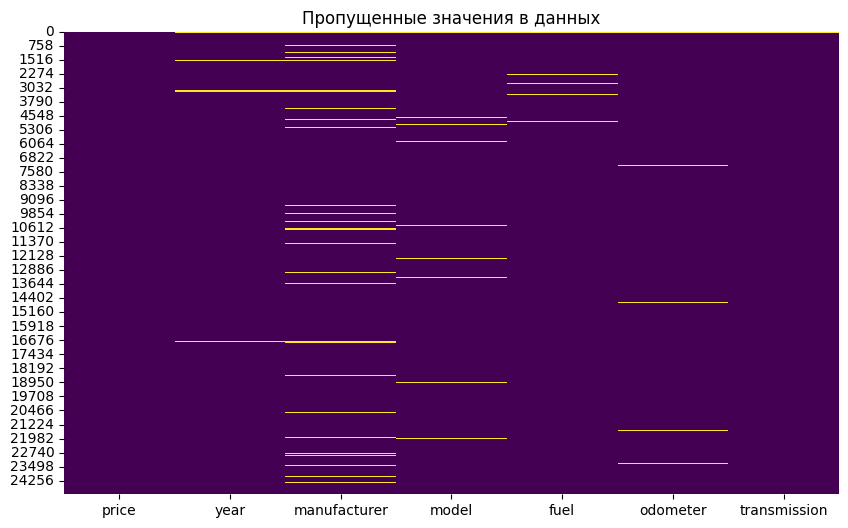

In [ ]:
# Проверка на пропущенные значения
print("Количество пропущенных значений в каждом столбце:\n", df.isnull().sum())

# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в данных')
plt.show()

# Основная статистика
# print(df.describe())

**Графики зависимостей**

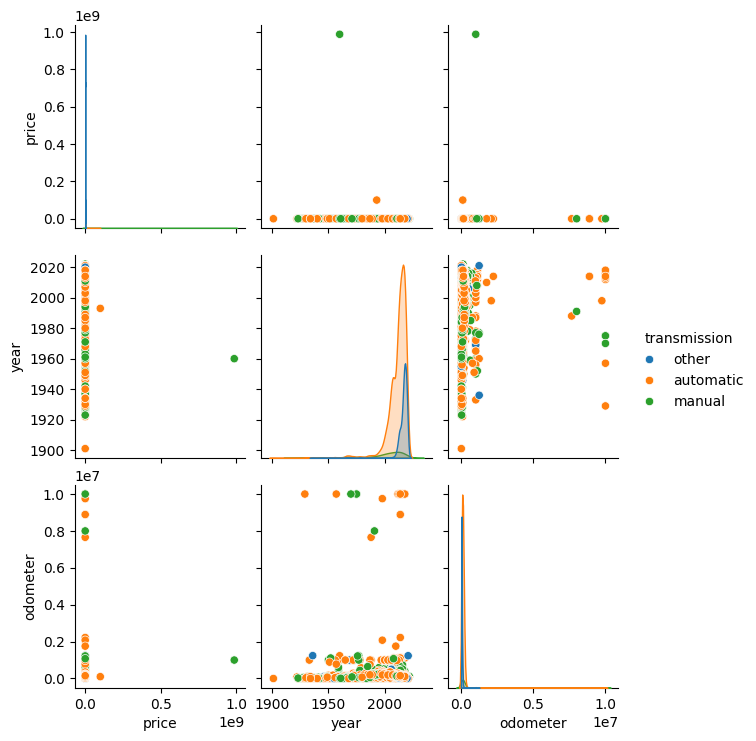

In [ ]:
sns.pairplot(data=df, aspect=.85, hue='transmission')
plt.show()

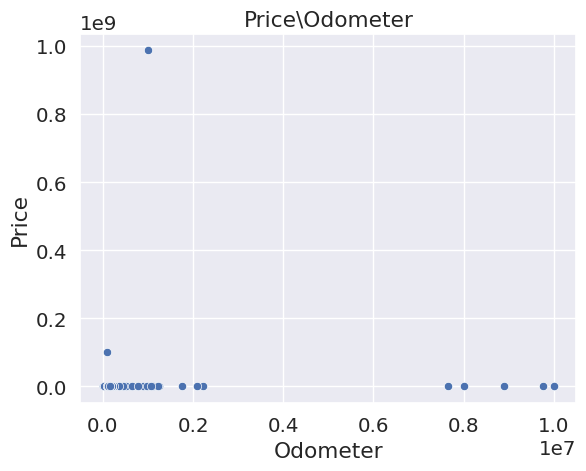

In [ ]:
sns.set(font_scale=1.3)
sns.scatterplot(x='odometer', y='price', data=df)
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price\Odometer')
plt.show()


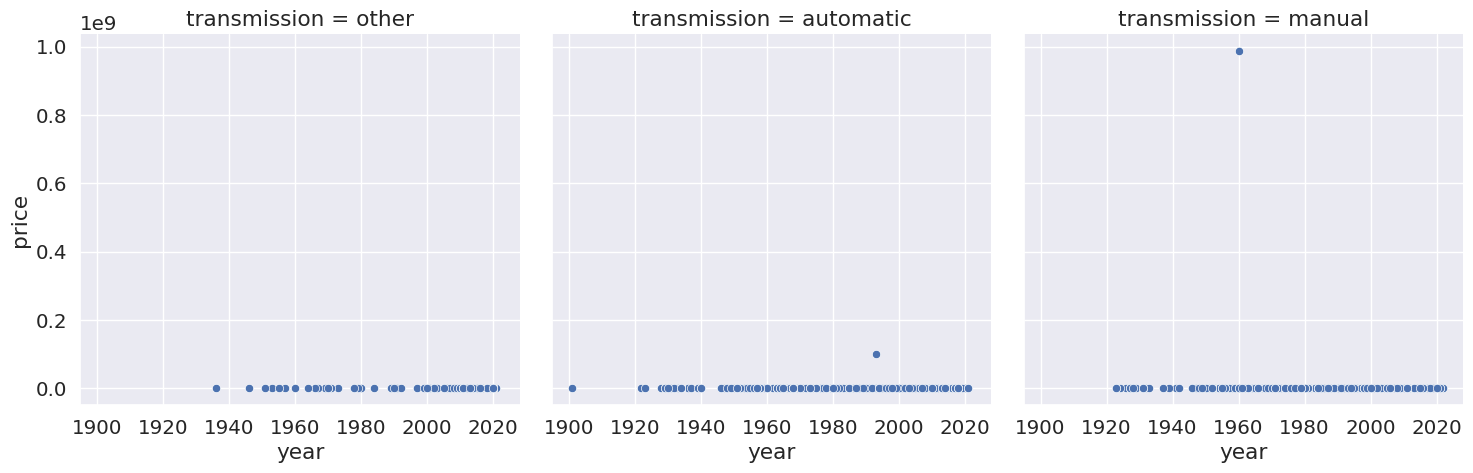

In [ ]:
sns.relplot(x='year', y='price', data=df, kind='scatter', col='transmission')
plt.show()

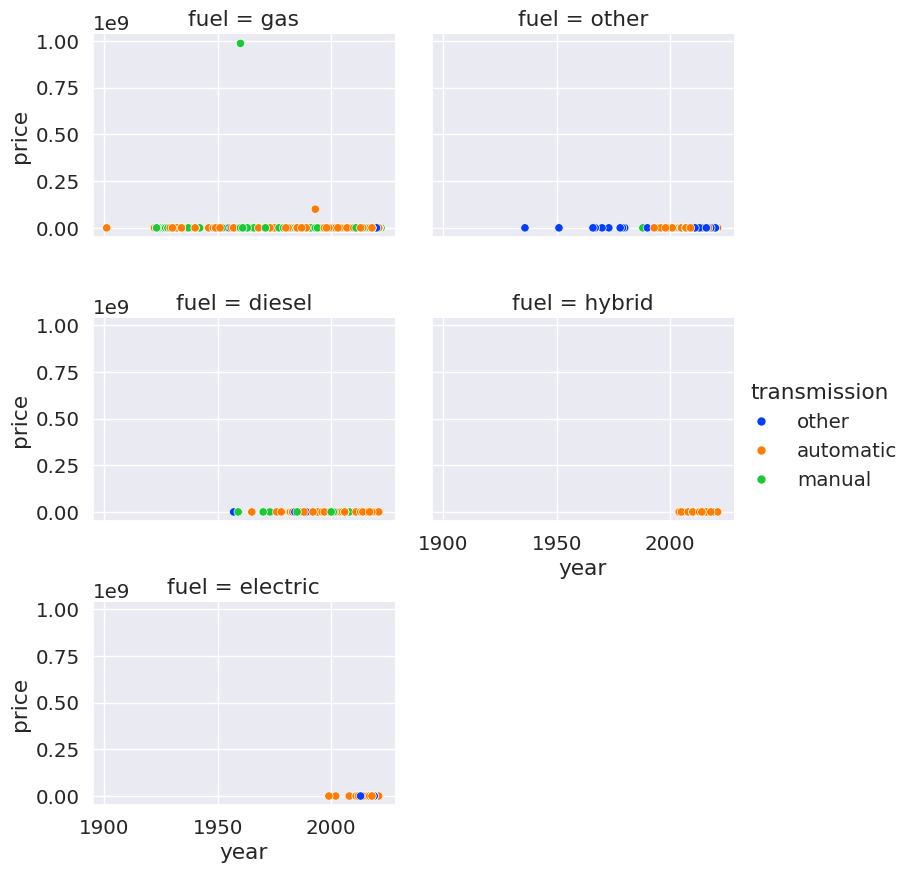

In [ ]:
sns.relplot(x='year', y='price', data=df, palette='bright', height=3, aspect=1.3,
            kind='scatter', hue='transmission', col='fuel', col_wrap=2)
plt.show()

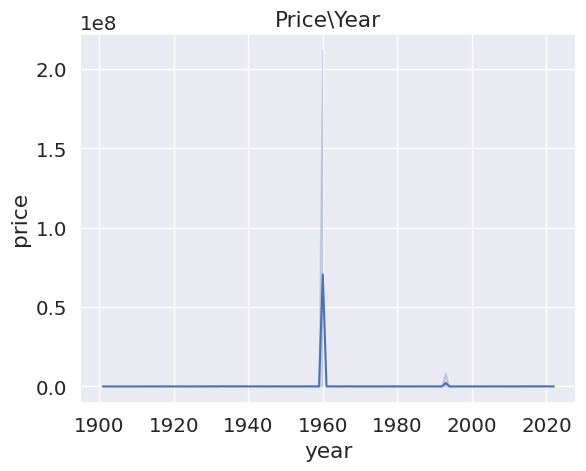

In [ ]:
sns.lineplot(x="year", y="price", data=df)
plt.title('Price\Year')
plt.show()

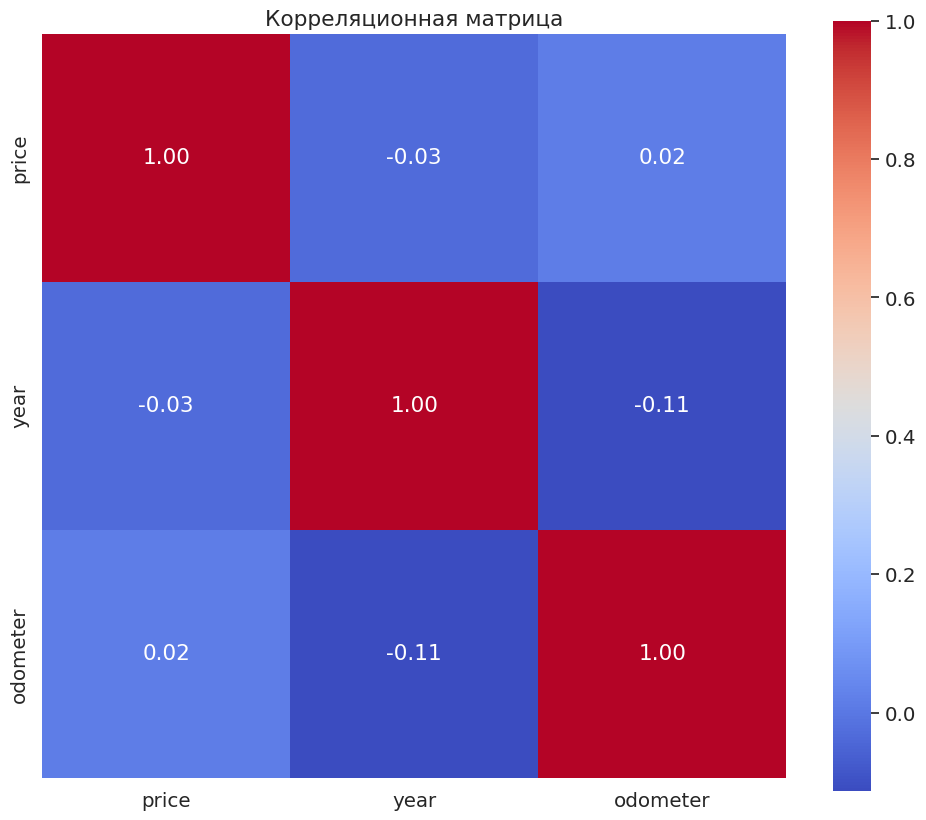

In [ ]:
# Корреляционный анализ
df1 = df[['price', 'year', 'odometer']]
plt.figure(figsize=(12, 10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()


**Подготовка данных**

In [ ]:
df = df.dropna()

df['price'] = df['price'].astype(float)
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)




<ipython-input-11-b02aca66ec51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
<ipython-input-11-b02aca66ec51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
<ipython-input-11-b02aca66ec51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

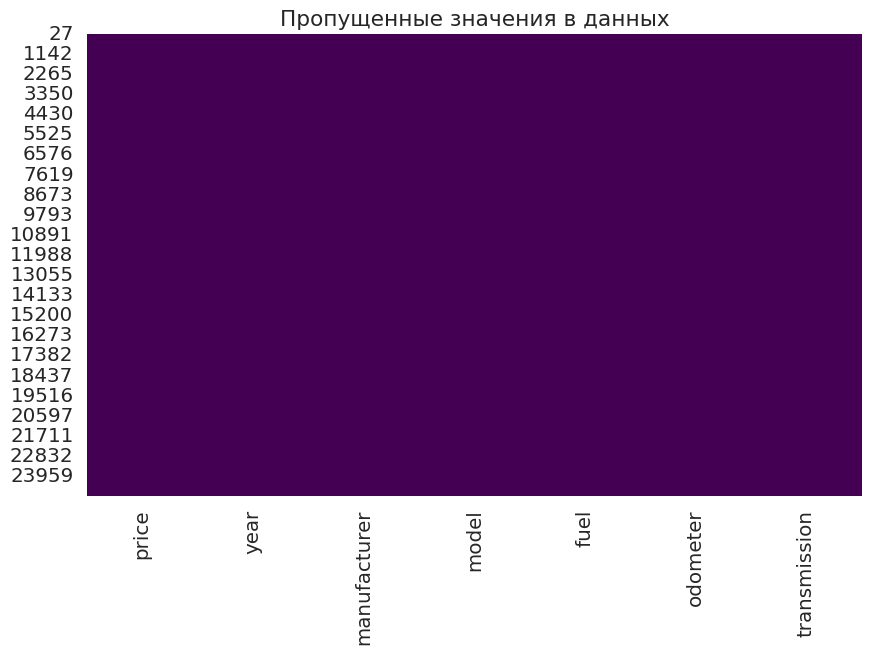

In [ ]:
# Визуализация пропущенных значений после подготовки данных
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в данных')
plt.show()

In [ ]:
# Применяем get_dummies
df = pd.get_dummies(df, columns=['manufacturer', 'model', 'fuel', 'transmission'])

# Переименовываем столбцы, чтобы избежать недопустимых символов
df.columns = df.columns.str.replace(r'\[', '_', regex=True).str.replace(r'\]', '_', regex=True)

# Нормализация
df[['price', 'year', 'odometer']] = df[['price', 'year', 'odometer']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Разделяем на тестовые и тренировочные данные
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Обучение разных моделей**

In [ ]:
# Модель Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')


MAE: 0.00
MSE: 0.00


**Еще один график зависимостей**

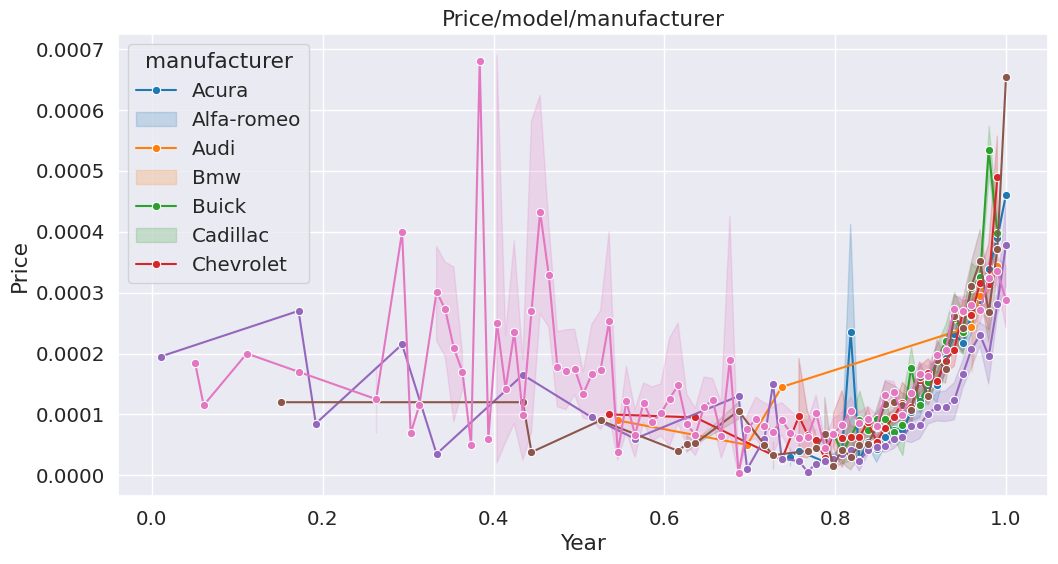

In [ ]:
# Преобразуем данные в длинный формат
melted_df = pd.melt(df, id_vars=['year', 'price'],
                     value_vars=['manufacturer_acura', 'manufacturer_alfa-romeo',
                                 'manufacturer_audi', 'manufacturer_bmw',
                                 'manufacturer_buick', 'manufacturer_cadillac',
                                 'manufacturer_chevrolet'],
                     var_name='manufacturer', value_name='is_manufacturer')

# Еще один график зависимостей
melted_df = pd.melt(df, id_vars=['year', 'price'],
                     value_vars=['manufacturer_acura', 'manufacturer_alfa-romeo',
                                 'manufacturer_audi', 'manufacturer_bmw',
                                 'manufacturer_buick', 'manufacturer_cadillac',
                                 'manufacturer_chevrolet'],
                     var_name='manufacturer', value_name='is_manufacturer')

melted_df = melted_df[melted_df['is_manufacturer'] == 1]
melted_df.drop(columns=['is_manufacturer'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='year', y='price', hue='manufacturer',
             palette='tab10', marker='o')
plt.title('Price/model/manufacturer')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='manufacturer', labels=[manufacturer.split('_')[1].capitalize() for manufacturer in melted_df['manufacturer'].unique()])
plt.show()
